In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sbn 

In [3]:
res = pd.read_csv('../output/from_exacloud/cpx_hparam_tuning/hparam_test_results.csv')
res.head() 

,lr,wd,channels,batch_size,dropout,checkpoint,bias,optim,lr_scheduler,remove_relation_idx,...,test_Top1,test_Top3,test_Top10,test_Top100,test_avg_AUC,test_avg_AP,test_avg_Brier,test_ECE,test_uid,uid
0,0.001,0.000000e+00,256,10000,0.1,False,False,adam,NaN,NaN,...,0.015432,0.049383,0.151235,0.558642,0.983088,0.095127,0.260884,0.484655,946ef7bb-39b3-4341-bb72-a37f643fae0b,946ef7bb-39b3-4341-bb72-a37f643fae0b
1,0.005,1.000000e-07,512,25000,0.1,False,False,adam,NaN,NaN,...,0.043210,0.086420,0.175926,0.614198,0.976255,0.141578,0.257873,0.485321,f5ef4af5-90b4-44a4-a17e-35998901ddfb,f5ef4af5-90b4-44a4-a17e-35998901ddfb
2,0.010,1.000000e-06,512,25000,0.1,False,False,adam,NaN,NaN,...,0.058642,0.104938,0.280864,0.750000,0.981783,0.172454,0.195563,0.415412,e9e1b6c5-ffb1-4d63-afb2-c1e9674a6c04,e9e1b6c5-ffb1-4d63-afb2-c1e9674a6c04
3,0.010,1.000000e-06,256,5000,0.0,False,False,adam,NaN,NaN,...,0.033951,0.092593,0.194444,0.672840,0.977572,0.129599,0.252618,0.479115,68754191-59e3-4dc9-b2dd-4df9091276ca,68754191-59e3-4dc9-b2dd-4df9091276ca
4,0.010,1.000000e-06,512,10000,0.0,False,False,adam,NaN,NaN,...,0.052469,0.157407,0.296296,0.799383,0.978425,0.196833,0.213996,0.435387,243a0028-a2b2-472e-a8d0-852c86757b51,243a0028-a2b2-472e-a8d0-852c86757b51


In [4]:
res.columns

Index(['lr', 'wd', 'channels', 'batch_size', 'dropout', 'checkpoint', 'bias',
       'optim', 'lr_scheduler', 'remove_relation_idx', 'num_workers',
       'n_epochs', 'val_lr', 'val_wd', 'val_channels', 'val_batch_size',
       'val_dropout', 'val_checkpoint', 'val_bias', 'val_optim',
       'val_lr_scheduler', 'val_remove_relation_idx', 'val_num_workers',
       'val_n_epochs', 'val_MRR', 'val_Top1', 'val_Top3', 'val_Top10',
       'val_Top100', 'val_avg_AUC', 'val_avg_AP', 'val_avg_Brier', 'val_ECE',
       'val_uid', 'test_lr', 'test_wd', 'test_channels', 'test_batch_size',
       'test_dropout', 'test_checkpoint', 'test_bias', 'test_optim',
       'test_lr_scheduler', 'test_remove_relation_idx', 'test_num_workers',
       'test_n_epochs', 'test_MRR', 'test_Top1', 'test_Top3', 'test_Top10',
       'test_Top100', 'test_avg_AUC', 'test_avg_AP', 'test_avg_Brier',
       'test_ECE', 'test_uid', 'uid'],
      dtype='object')

In [5]:
res.sort_values('val_MRR', ascending=False)[['lr', 'wd', 'channels', 'batch_size', 'dropout', 'val_MRR', 'val_avg_AUC']].head().style.hide()

lr,wd,channels,batch_size,dropout,val_MRR,val_avg_AUC
0.010000,0.000001,1024,10000,0.000000,0.193079,0.960321
0.001000,0.000001,1024,10000,0.000000,0.173081,0.959787
0.010000,0.000000,1024,10000,0.000000,0.169492,0.964326
0.010000,0.000001,1024,10000,0.000000,0.168101,0.974663
0.001000,0.000001,1024,25000,0.000000,0.164964,0.974743


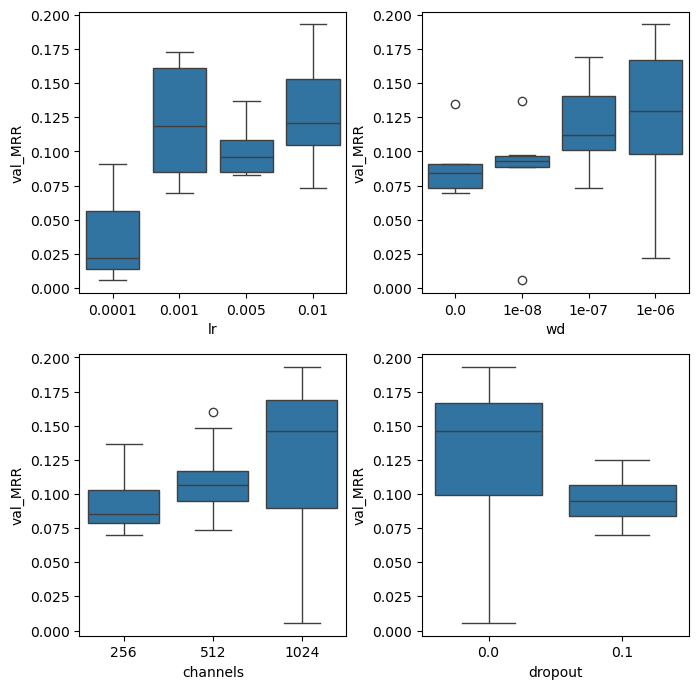

In [6]:
f,axes = plt.subplots(2,2, figsize=(7,7))
sbn.boxplot(data=res, x='lr', y='val_MRR', ax=axes[0, 0])
sbn.boxplot(data=res, x='wd', y='val_MRR', ax=axes[0, 1])
sbn.boxplot(data=res, x='channels', y='val_MRR', ax=axes[1, 0])
sbn.boxplot(data=res, x='dropout', y='val_MRR', ax=axes[1, 1])
plt.tight_layout()
plt.show()